In [3]:
using DelimitedFiles
using Plots; gr();
using Statistics
using StatsBase
using Distributions

In [4]:
dat, header = readdlm("../data/adjustedPerplexRes.csv", ',', header=true);
header = header[:]

# No eclogites plz
eclogites = [9,10,11,14,16,19]
filter = [! (s in eclogites) for s in dat[:,1]]
dat = dat[filter, :]

# Interested in non-nan differences between actual and Perplex data
ers = fill(NaN, (size(dat)[1],3));
ers[:,2] .= dat[:,findfirst(isequal("perplex vp"), header)] .- dat[:,findfirst(isequal("dabie vp"), header)]
ers[:,3] .= dat[:,findfirst(isequal("perplex vp/vs"), header)] .- dat[:,findfirst(isequal("dabie vp/vs"), header)]
ers[:,1] .= dat[:,findfirst(isequal("perplex rho"), header)] .- (1000 .* dat[:,findfirst(isequal("dabie rho"), header)]);
ers = ers[.!(isnan.(sum(ers, dims=2)))[:],:];
N_er = fit(MvNormal, ers')


FullNormal(
dim: 3
μ: [68.44793126702065, 0.31598110439869675, -0.015034281680500299]
Σ: [6525.01008056395 1.7402195917804035 -0.07114150383108897; 1.7402195917804035 0.07776204045537737 0.002195074423162562; -0.07114150383108897 0.002195074423162562 0.0021504243944476136]
)


In [38]:
idx = 2
dats = ers[:,idx] .- mean(ers[:,idx])
stephist(dats,
    framestyle=:box, yticks=false, legend=false, normalize=:pdf)
vline!([0.0], title="vp")
xs = range(minimum(dats), maximum(dats), length=100)
plot!(xs, pdf.(fit(Normal, dats), xs))
#savefig("../../thesis/figures/vp_er_std_perplex_ah.png")

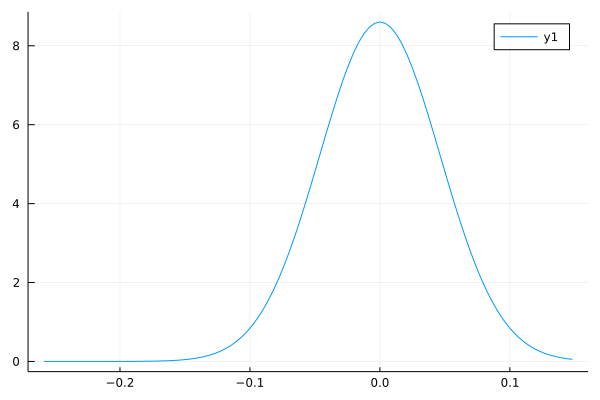

In [33]:
xs = range(minimum(dats), maximum(dats), length=100)
plot(xs, pdf.(fit(Normal, dats), xs))